In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
df=pd.read_csv(r"C:\Users\DHRUV AGARWAL\Desktop\Machine Learning Algo\Datasets\Algerian_forest_fires_cleaned_dataset.csv")
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [9]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [10]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
x=df.drop('FWI',axis=1)
y=df['FWI']


In [12]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


In [14]:
print(f"the following shapes after the train test split is :\n x:train:{x_train.shape} and y_train:{y_train.shape}")

the following shapes after the train test split is :
 x:train:(194, 11) and y_train:(194,)


In [15]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


<Axes: >

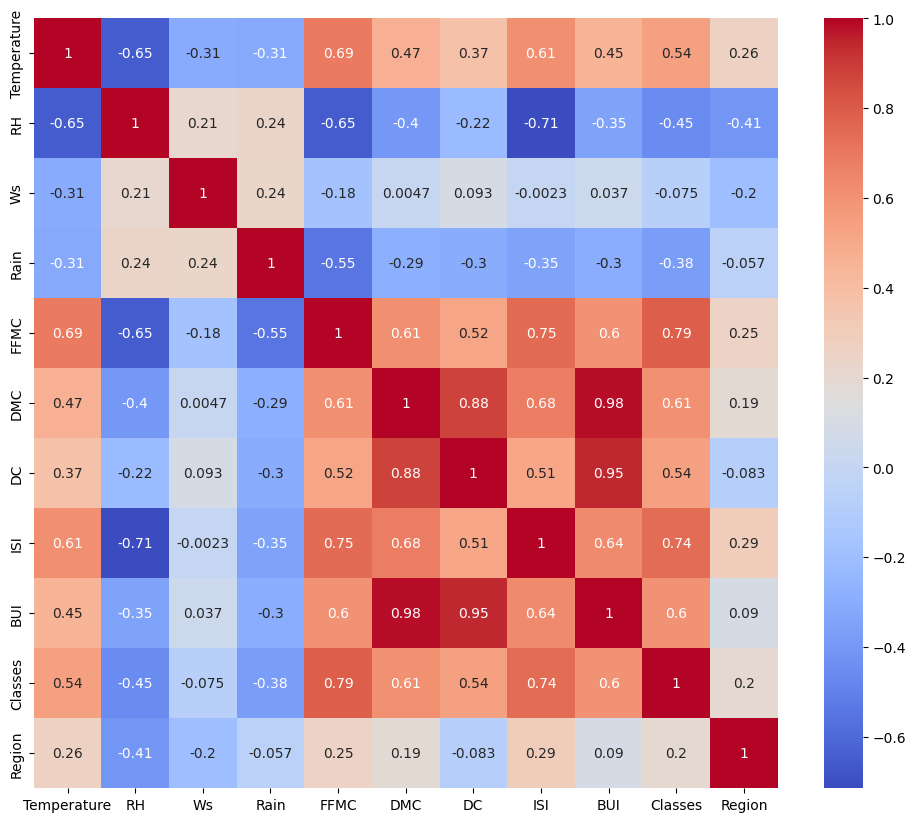

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(x_train.corr(),annot=True,cmap='coolwarm')



In [17]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [21]:
## threshold--Domain expertise
corr_features=correlation(x_train,0.85)
print(corr_features)

set()


In [20]:
## drop features when correlation is more than 0.85 
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((194, 9), (49, 9))

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

Text(0.5, 1.0, 'X_train After Scaling')

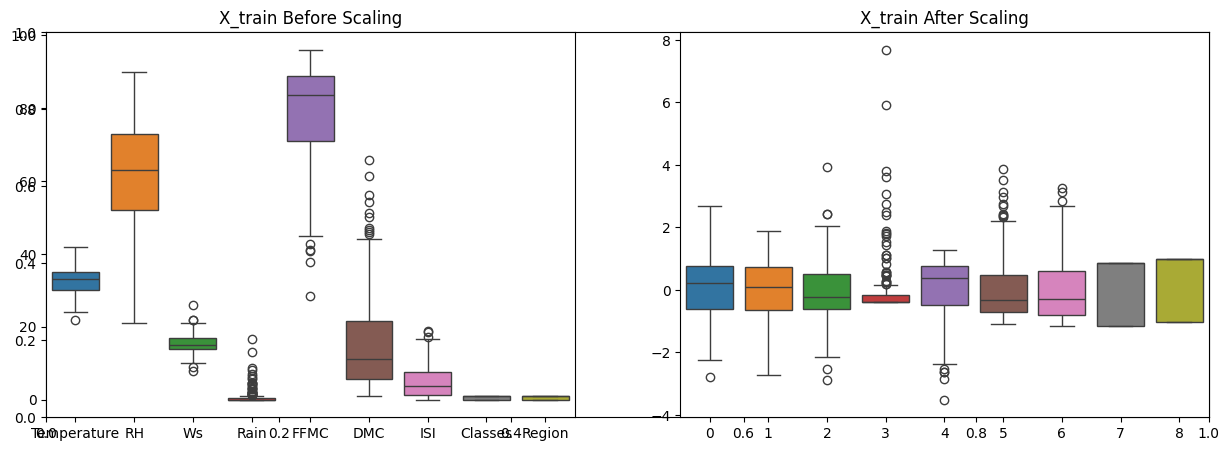

In [23]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=x_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=x_train_scaled)
plt.title('X_train After Scaling')

The mean absolute error is :0.5049978694165663
The r2 score is :0.9805895859259883


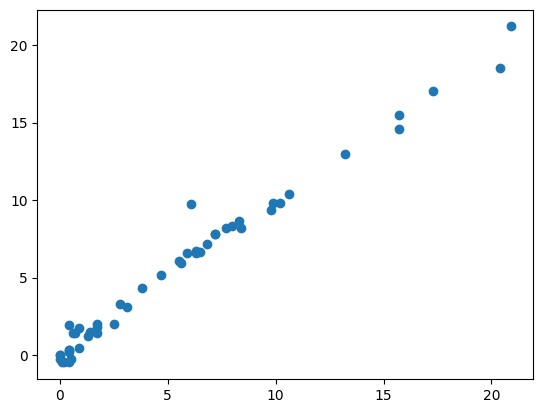

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
Lr=LinearRegression()
Lr.fit(x_train_scaled,y_train)
y_pred=Lr.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"The mean absolute error is :{mae}")
print(f"The r2 score is :{r2}")
"""R2 score determined how well the regression model fits the data. An R2 score of 1 indicates that the model perfectly explains the variance in the target variable, while an R2 score of 0 indicates that the model does not explain any of the variance. Negative R2 scores can occur when the model performs worse than a horizontal line representing the mean of the target variable."""
plt.scatter(y_test,y_pred)

The mean absolute error is :1.0093958923873407
The r2 score is :0.9430507350726562


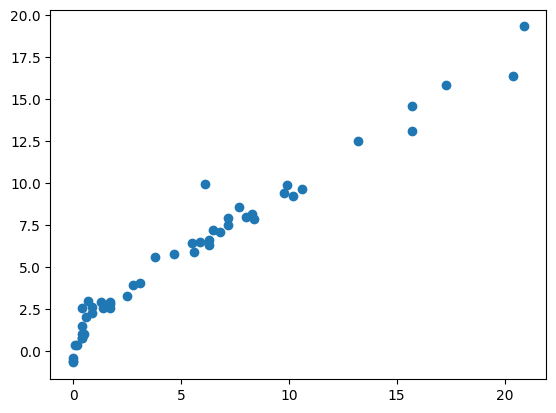

In [25]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"The mean absolute error is :{mae}")
print(f"The r2 score is :{r2}")
plt.scatter(y_test,y_pred)

In [26]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [27]:
lassocv.alpha_

np.float64(0.04391080246587261)

In [28]:
lassocv.alphas_

array([7.1563667 , 6.67405153, 6.2242428 , 5.80474966, 5.41352896,
       5.04867523, 4.70841142, 4.39108025, 4.09513613, 3.81913766,
       3.56174057, 3.32169117, 3.09782031, 2.88903759, 2.69432612,
       2.51273756, 2.34338746, 2.18545099, 2.0381589 , 1.90079382,
       1.77268667, 1.65321353, 1.54179247, 1.43788081, 1.34097246,
       1.2505954 , 1.16630946, 1.08770411, 1.01439649, 0.94602956,
       0.88227033, 0.82280827, 0.76735374, 0.71563667, 0.66740515,
       0.62242428, 0.58047497, 0.5413529 , 0.50486752, 0.47084114,
       0.43910802, 0.40951361, 0.38191377, 0.35617406, 0.33216912,
       0.30978203, 0.28890376, 0.26943261, 0.25127376, 0.23433875,
       0.2185451 , 0.20381589, 0.19007938, 0.17726867, 0.16532135,
       0.15417925, 0.14378808, 0.13409725, 0.12505954, 0.11663095,
       0.10877041, 0.10143965, 0.09460296, 0.08822703, 0.08228083,
       0.07673537, 0.07156367, 0.06674052, 0.06224243, 0.0580475 ,
       0.05413529, 0.05048675, 0.04708411, 0.0439108 , 0.04095

In [29]:
lassocv.mse_path_

array([[68.58934997, 64.28650232, 49.25415197, 79.11474083, 38.68688171],
       [63.2664675 , 58.77362304, 43.20292636, 77.07183352, 34.66910628],
       [56.87389457, 51.79652473, 37.15764773, 69.4806422 , 31.16497557],
       [51.2737596 , 45.69461734, 31.98560721, 62.80993539, 27.46286399],
       [45.36816855, 40.35928545, 27.56726322, 56.94442062, 23.75447628],
       [39.875005  , 35.69250404, 23.79907917, 50.31847875, 20.54655878],
       [35.0794232 , 31.60885664, 20.59132915, 44.35263414, 17.77349727],
       [30.89154006, 28.0342798 , 17.86626498, 39.14265375, 15.37720198],
       [27.23334321, 24.90389594, 15.55674604, 34.59116894, 13.30754905],
       [24.03652419, 22.16129069, 13.60451947, 30.61376519, 11.52101422],
       [21.24273995, 19.75730052, 11.95924131, 27.13693185,  9.97950732],
       [18.80004176, 17.64896267, 10.57738151, 24.09623192,  8.65087048],
       [16.66356323, 15.79916526,  9.42117661, 21.43679316,  7.50627555],
       [14.79422393, 14.17520895,  8.4

The mean absolute error is :0.5556715031617872
The r2 score is :0.978328234520343


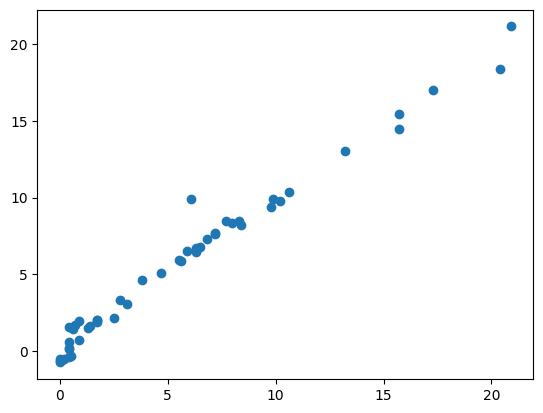

In [31]:
y_pred=lassocv.predict(x_test_scaled)  
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"The mean absolute error is :{mae}")
print(f"The r2 score is :{r2}")